In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import missingno as msno
import seaborn as sn

In [2]:
data = pd.read_csv('diabetes2a.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1


In [3]:
# Navigate and clean data
data.isna().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                1
SkinThickness                9
Insulin                     22
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [4]:
data.isin([0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                34
SkinThickness               218
Insulin                     352
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [5]:
# Convert 0's to NaN
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
data[cols] = data[cols].replace({'0':np.nan, 0:np.nan})

<AxesSubplot:>

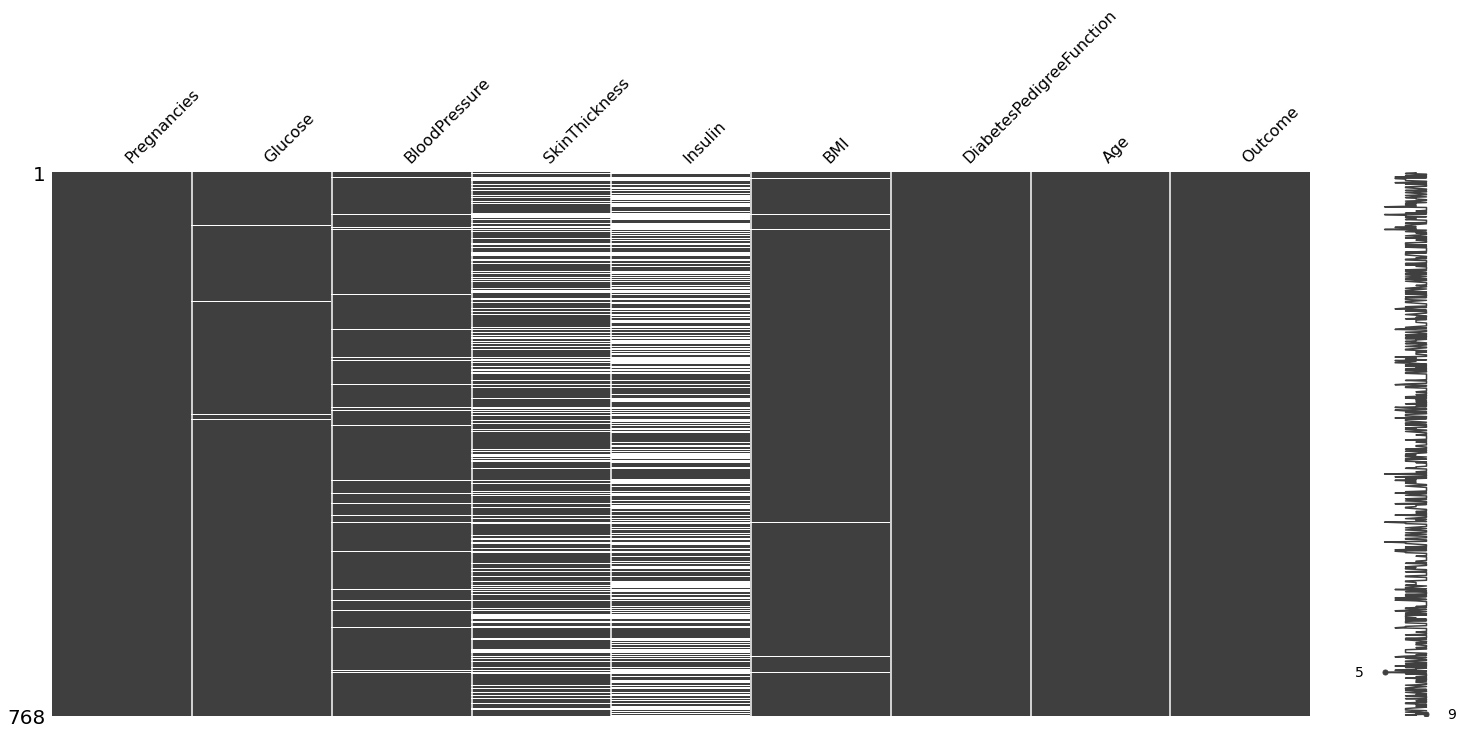

In [6]:
msno.matrix(data)

In [7]:
(data['Glucose'].isna()
 | data['BloodPressure'].isna()
 | data['BMI'].isna()).sum()

44

In [8]:
(data['Glucose'].isna()
 | data['BMI'].isna()).sum()

16

<AxesSubplot:>

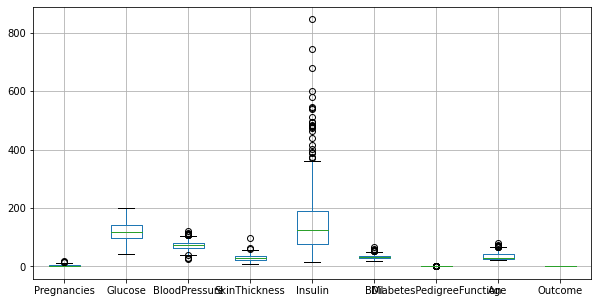

In [9]:
data.boxplot(figsize=(10,5))

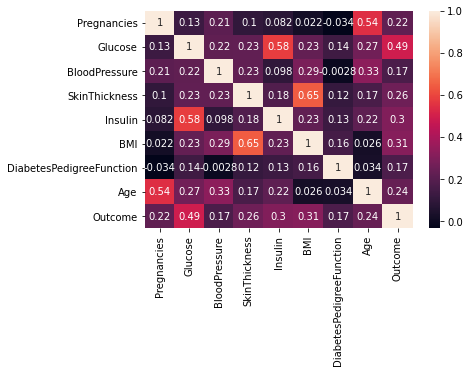

In [10]:
sn.heatmap(data.corr(), annot=True)
plt.show()

In [11]:
# Drop some rows with NaN
data.dropna(subset=['Glucose', 'BloodPressure', 'BMI'], inplace=True)

In [12]:
# Remove highly correlated attributes and setup datasets for processing

data1 = data.drop(columns=['Insulin', 'SkinThickness', 'Pregnancies'])
data2 = data.drop(columns=['Insulin', 'SkinThickness'])
data3 = data.drop(columns=['Insulin'])

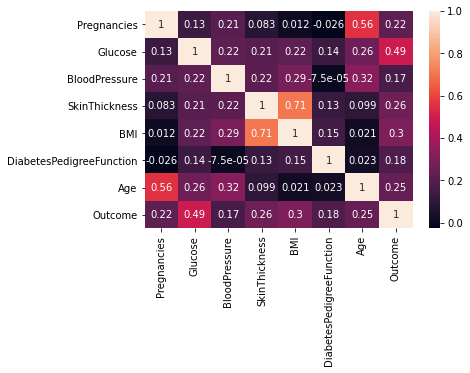

In [13]:
# Linear regression to fill SkinThickness (dataset #3)

polynomial_features = PolynomialFeatures(degree=2,
                                         include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
X = data3.dropna(subset=['SkinThickness'])
X = X['BMI'].values.reshape(-1, 1)
y = data3['SkinThickness'].dropna().values
pipeline.fit(X, y)

for i, r in data3.iterrows():
    if (not pd.notnull(r['SkinThickness'])):
        data3.loc[i, 'SkinThickness'] = pipeline.predict(r['BMI'].reshape(1, -1))

sn.heatmap(data3.corr(), annot=True)
plt.show()

In [14]:
y = [data1.pop('Outcome').values,
     data2.pop('Outcome').values,
     data3.pop('Outcome').values]
X = [data1.values,
     data2.values,
     data3.values]

In [15]:
logReg = LogisticRegression(max_iter=200)
for i in range(0, 3):
    logReg.fit(X[i], y[i])
    print(logReg.score(X[i], y[i]))
    print(metrics.confusion_matrix(y[i], logReg.predict(X[i])))
    print('Train/Test\tScore')
    for n in range(10, 100, 10):
        listn = []
        for m in range(0, 50):
            X_train, X_test, y_train, y_test = train_test_split(X[i], y[i], 
                                                                test_size=n/100, 
                                                                stratify=y[i])
            logReg.fit(X_train, y_train)
            listn.append(logReg.score(X_test, y_test))
        print(str(100-n) + '/' + str(n) + '\t\t'
              + str(sum(listn) / len(listn)))
    print()

0.7790055248618785
[[420  55]
 [105 144]]
Train/Test	Score
90/10		0.7693150684931506
80/20		0.7746206896551723
70/30		0.7735779816513765
60/40		0.7717931034482759
50/50		0.7757458563535913
40/60		0.7713563218390804
30/70		0.7687573964497042
20/80		0.7623103448275863
10/90		0.752239263803681

0.7762430939226519
[[421  54]
 [108 141]]
Train/Test	Score
90/10		0.7663013698630138
80/20		0.7717241379310341
70/30		0.7709174311926603
60/40		0.766896551724138
50/50		0.769558011049724
40/60		0.767448275862069
30/70		0.767021696252465
20/80		0.7636896551724135
10/90		0.7516564417177917

0.7693370165745856
[[418  57]
 [110 139]]
Train/Test	Score
90/10		0.7679452054794516
80/20		0.764689655172414
70/30		0.7681651376146789
60/40		0.7699999999999999
50/50		0.7683977900552486
40/60		0.7637241379310344
30/70		0.7596055226824457
20/80		0.7558965517241377
10/90		0.7443558282208591

